In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['figure.figsize'] = (20.0, 10.0)
font = {'size'   : 16}
plt.rc('font', **font)
plt.ion()
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

In [15]:
import src.modelx as m

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df = m.import_data('data/Train.csv')

/Users/ericbragas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [19]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['state'].value_counts()

Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska        

In [4]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [5]:
df_num = df[['SalePrice', 'MachineID', 'ModelID', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', ]]

In [25]:
X, y = m.select_features(df)
X[:10], y[:10]

(   MachineID  ModelID  auctioneerID  YearMade           state  \
 0     999089     3157           3.0      2004         Alabama   
 1     117657       77           3.0      1996  North Carolina   
 2     434808     7009           3.0      2001        New York   
 3    1026470      332           3.0      2001           Texas   
 4    1057373    17311           3.0      2007        New York   
 5    1001274     4605           3.0      2004         Arizona   
 6     772701     1937           3.0      1993         Florida   
 7     902002     3539           3.0      2001        Illinois   
 8    1036251    36003           3.0      2008           Texas   
 9    1016474     3883           3.0      1000         Florida   
 
    MachineHoursCurrentMeter  
 0                      68.0  
 1                    4640.0  
 2                    2838.0  
 3                    3486.0  
 4                     722.0  
 5                     508.0  
 6                   11540.0  
 7                    48

In [33]:
X.head()

,MachineID,ModelID,auctioneerID,YearMade,state,MachineHoursCurrentMeter
0,999089,3157,3.0,2004,Alabama,68.0
1,117657,77,3.0,1996,North Carolina,4640.0
2,434808,7009,3.0,2001,New York,2838.0
3,1026470,332,3.0,2001,Texas,3486.0
4,1057373,17311,3.0,2007,New York,722.0


In [34]:
m.clean_features(X)

,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,Alabama,Alaska,Arizona,Arkansas,California,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,999089,3157,3.0,2004,68.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,117657,77,3.0,1996,4640.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,434808,7009,3.0,2001,2838.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1026470,332,3.0,2001,3486.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1057373,17311,3.0,2007,722.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1001274,4605,3.0,2004,508.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,772701,1937,3.0,1993,11540.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,902002,3539,3.0,2001,4883.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1036251,36003,3.0,2008,302.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1016474,3883,3.0,1000,20700.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_num1 = df_num.drop('MachineHoursCurrentMeter', axis=1)

In [7]:
df_num1.dropna(axis=0, inplace=True)

In [8]:
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380989 entries, 0 to 401124
Data columns (total 5 columns):
SalePrice       380989 non-null int64
MachineID       380989 non-null int64
ModelID         380989 non-null int64
auctioneerID    380989 non-null float64
YearMade        380989 non-null int64
dtypes: float64(1), int64(4)
memory usage: 17.4 MB


In [9]:
X = sm.add_constant(df_num1.drop('SalePrice', axis=1))
y = df_num1['SalePrice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [11]:
model1 = sm.OLS(y_train, X_train)
model1_results = model1.fit()
model1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5195.
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:15:02   Log-Likelihood:            -2.9176e+06
No. Observations:              255262   AIC:                         5.835e+06
Df Residuals:                  255257   BIC:                         5.835e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.392e+04    327.506     73.040      0.000    2.33e+04    2.46e+04
MachineID       -0.0116      0.000   -113.383      0.000      -0.012      -0.011
ModelID         -0.0364      0.007     -5.012      0.000      -0.051      -0.022
auctioneerID   -59.9109      2.592    -23.113      0.000     -64.991     -54.830
YearMade        11.5024      0.153     75.255      0.000      11.203      11.802
==============================================================================
Omnibus:                    64222.415   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141074.630
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       5.178   Cond. No.                     9.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model1.predict

<bound method RegressionModel.predict of <statsmodels.regression.linear_model.OLS object at 0x1a1eff96a0>>

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaler.transform(X_train)

array([[ 0.        ,  0.66661869, -1.09627854, -0.32749754,  0.3221745 ],
       [ 0.        ,  0.25246486, -0.58943631, -0.32749754,  0.3567631 ],
       [ 0.        ,  0.5965614 , -0.36063418, -0.32749754,  0.34292766],
       ...,
       [ 0.        ,  0.01453254, -0.34503403, -0.26870862,  0.32909222],
       [ 0.        , -2.24838713,  2.79563275, -0.20991969,  0.35330424],
       [ 0.        ,  0.70383834, -0.3409715 , -0.32749754,  0.33255108]])

In [16]:
lm1 = LinearRegression()

In [17]:
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
pred1 = lm1.predict(X_test)

In [19]:
lm1.score(X_test, y_test)

0.07390687372873728

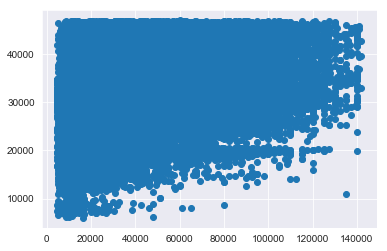

In [20]:
plt.scatter(y_test, pred1)

In [22]:
residuals = y_test - pred1

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


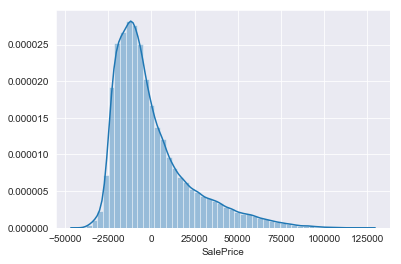

In [23]:
sns.distplot(residuals)

In [26]:
cross_val_score(lm1, X_train, y_train)

array([0.07394906, 0.07763387, 0.07406051])